In [1]:
from google.colab import drive
drive.mount('/content/drive/')


ModuleNotFoundError: No module named 'google.colab'


## Notebook Structure

This notebook is structured as follows:

1. [Getting Started with Data](#getting-started-with-data)
2. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Task to Achieve](#task-to-achieve)


## Introduction to the NTX Data Analysis Competition

Welcome to the NTX Data Analysis Competition, where we focus on analyzing EEG data collected using IDUN Guardian Earbuds. This competition aims to harness the power of machine learning in interpreting EEG data for innovative applications in neuroscience and related fields.

### Dataset Overview
The dataset available for this competition has been collected using IDUN Guardian Earbuds. During data collection, participants also used a second reference system, the Cerebra Prodigy head unit, which consisted of two frontal EEG, 2 EOG, and an EMG sensor. However, this reference system's data is not included in the dataset provided.

For more information about the IDUN Guardian Earbuds, refer to the following links:
* [IDUN Website](https://iduntechnologies.com/idun-guardian-in-ear-eeg-platform/)
* [IDUN White Paper Highlights](https://25500273.fs1.hubspotusercontent-eu1.net/hubfs/25500273/Official%20White%20Paper%20Folder/White%20Paper%20IDUN%20Technologies.pdf)

#### IDUN Guardian Earbuds
- **Electrodes**: Two tip-shaped dry electrodes; one in each ear. The reference electrode is in the left ear canal, and the measuring electrode is in the right ear canal.
- **Ground Electrode**: Integrated into the hook over the left ear.
- **Sampling Rate**: 250Hz.
- **Filtering**: Data filtered between 0.75 and 35Hz, plus a second Guardian channel filtered between 4 and 18Hz (‘Guardian_4_18Hz’).

#### Data Composition
- **Subjects**: Data from 4 subjects, each with 1 night of recorded sleep.
- **Training Data**: Subjects 2 & 3's data will be used, including raw and filtered data, and a .csv file with timestamps and epochs.
- **Testing Data**: Subject 1's data will be used, including raw and filtered data, and a .csv file with timestamps and epochs (obviously without labels otherwise it wouldn't be much of a competition).
- **Validation Data**: Subject 4's data will be used and released 48h before the end of the competition.
- **CSV File Structure**: The first two columns are Timestamp (timepoint of occurrence of the marker in samples) and Epoch number (30s window in which the marker occurred). Followed by seven columns one-hot encoded for each of the markers.

### Marker Description
The EEG markers are as follows:
- **SS (Sleep Spindles)**: Binary (0 or 1), indicating presence or absence.
- **K (K-Complexes)**: Binary, associated with the sleep stage.
- **REM (Rapid Eye Movements)**: Binary, indicative of REM sleep.
- **Son (Sleep Onset)**: Binary, marking the beginning of sleep.
- **Soff (Sleep Offset)**: Binary, marking the end of sleep.
- **A (Arousals)**: Binary, indicating brief awakenings.
- **MS (Microsleep)**: Binary, short episodes of sleep.

### Competition Challenges and Resources
- **Multi-Class Machine Learning Challenge**: Participants will tackle a multi-class classification problem with seven EEG markers, requiring sophisticated strategies for classifying multiple classes effectively.
- **Class Imbalance**: The dataset presents challenges with class imbalances. Participants will be provided with exploratory code in the 'Exploratory Data Analysis' section to visualize and understand these imbalances, crucial for developing effective models.
- **Scoring Function - Weighted F1-Score**: The competition uses the weighted F1-score as the scoring metric, ideal for datasets with class imbalances, balancing precision and recall.
- **Transfer Learning Opportunity**: This competition involves transfer learning, with models trained on data from two subjects and tested on others, simulating real-world scenarios of model generalization.
- **Challenges of EEG Data Analysis**: EEG data analysis involves handling signal noise, variability, and artifacts. Participants are advised to employ preprocessing methods for data cleaning and enhancement.
- **Importance of Sleep Tracking**: Understanding and improving sleep quality is crucial, given the widespread prevalence of sleep disorders and their impact on mental and physical health. Accurate sleep tracking through EEG analysis can contribute significantly to sleep research and the development of sleep-related therapies.
- **Useful Resources and Toolboxes**:
  - [MNE Python Library](https://mne.tools/stable/index.html) for comprehensive EEG data analysis tools.
  - [pyRiemann Library](https://pyriemann.readthedocs.io/en/latest/index.html) for covariance matrix manipulation and classification in Riemannian space.
  - [Analysing EEG Data with MNE Tutorial](https://kel-github.github.io/), covering various aspects of EEG processing.

Participants are encouraged to leverage these resources to develop innovative machine learning models that can accurately interpret and classify EEG markers, pushing forward the field of neurotechnology.


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in any data science and machine learning project. It enables us to understand the data's underlying structure, identify patterns, and inform subsequent analysis and model building. This section explores the dataset to uncover insights and prepare the data for effective modeling.

### Summary Statistics
- **Class Balance Analysis**: Calculation and visualization of each marker class's proportions. This helps in identifying class imbalances that could impact model performance.
- **Timestamp Analysis**: Summary statistics for `Timestamp` are provided, coupled with a histogram or density plot to understand the distribution of time intervals between markers.
- **Epoch Analysis**: Summary statistics for `Epochs`, with a line or area chart illustrating marker counts over time. This can reveal trends or patterns across different epochs.

### Distribution of Marker Classes
- A bar chart visualizes the distribution of markers, making it easy to spot any class imbalances. This is crucial for understanding the data's nature and for making informed decisions in model training.

### Box Plot of Timestamp_samples by Marker
- Box plots are used to examine the spread and outliers of `Timestamp` for each marker. This is essential for understanding the variability and distribution of time intervals in the context of different markers.

### Additional Analyses
- **Correlation Heatmap**: Given that the markers are binary, a correlation heatmap can reveal relationships or associations between different markers. This analysis is useful in identifying potential dependencies or redundancies in the dataset.

Each of the below cells demonstrates these aspects, adhering to the philosophy, "If you torture the data long enough, it will confess." Insightful visualizations and statistical analyses are presented to provide a comprehensive understanding of the dataset.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File path subject 2
file_path = '/content/drive/My Drive/Colab Notebooks/NTX_Data_Challenge/Training_data/S002_labeled.csv'
# Read the data
df = pd.read_csv(file_path)

In [ ]:
print(df.head(10))

   Timestamp  Epochs  SS1  SS0  K1  K0  REM1  REM0  Son1  Son0  Soff1  Soff0  \
0       8644       2    0    1   0   0     1     0     0     0      0      0   
1       9770       2    0    1   0   0     1     0     0     0      0      0   
2      11064       2    0    1   0   0     1     0     0     0      0      0   
3      12266       2    0    1   0   0     1     0     0     0      0      0   
4      13515       2    0    1   0   0     1     0     0     0      0      0   
5      14833       2    0    1   0   0     1     0     0     0      0      0   
6     771984     103    1    0   0   0     0     0     0     0      0      0   
7     768841     103    1    0   0   0     0     0     0     0      0      0   
8     767183     103    1    0   0   0     0     0     0     0      0      0   
9     773621     104    1    0   0   0     0     0     0     0      0      0   

   A1  A0  MS1  MS0  
0   0   0    0    0  
1   0   0    0    0  
2   0   0    0    0  
3   0   0    0    0  
4   0   0

In [ ]:
print(df.dtypes)

Timestamp    int64
Epochs       int64
SS1          int64
SS0          int64
K1           int64
K0           int64
REM1         int64
REM0         int64
Son1         int64
Son0         int64
Soff1        int64
Soff0        int64
A1           int64
A0           int64
MS1          int64
MS0          int64
dtype: object


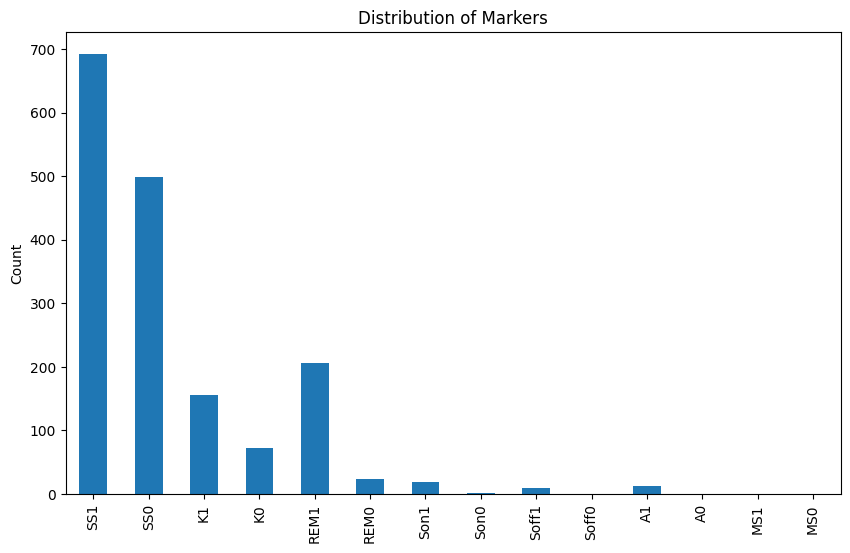

In [ ]:
# Plot the distribution of markers
marker_columns = ['SS1', 'SS0', 'K1', 'K0', 'REM1', 'REM0', 'Son1', 'Son0', 'Soff1', 'Soff0', 'A1', 'A0', 'MS1', 'MS0']
df[marker_columns].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Markers')
plt.ylabel('Count')
plt.show()

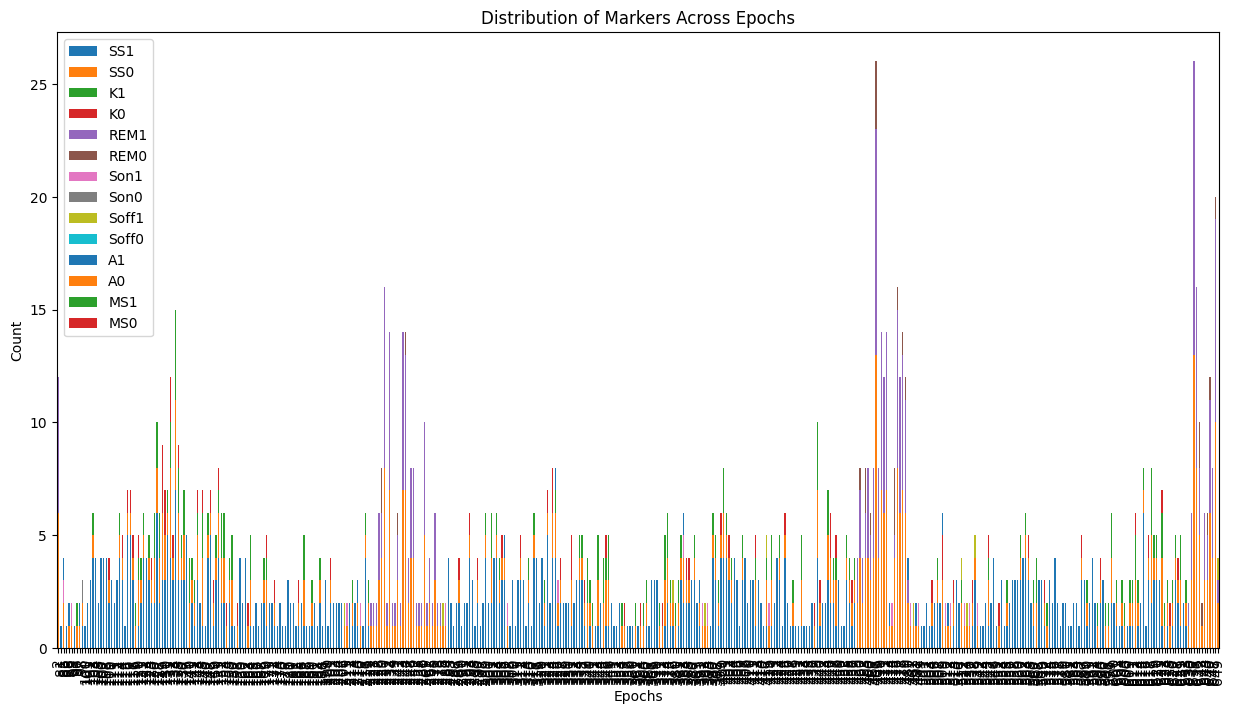

In [ ]:
# Distribution of markers across epochs
epoch_marker_counts = df.groupby('Epochs')[marker_columns].sum()
epoch_marker_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Distribution of Markers Across Epochs')
plt.ylabel('Count')
plt.show()

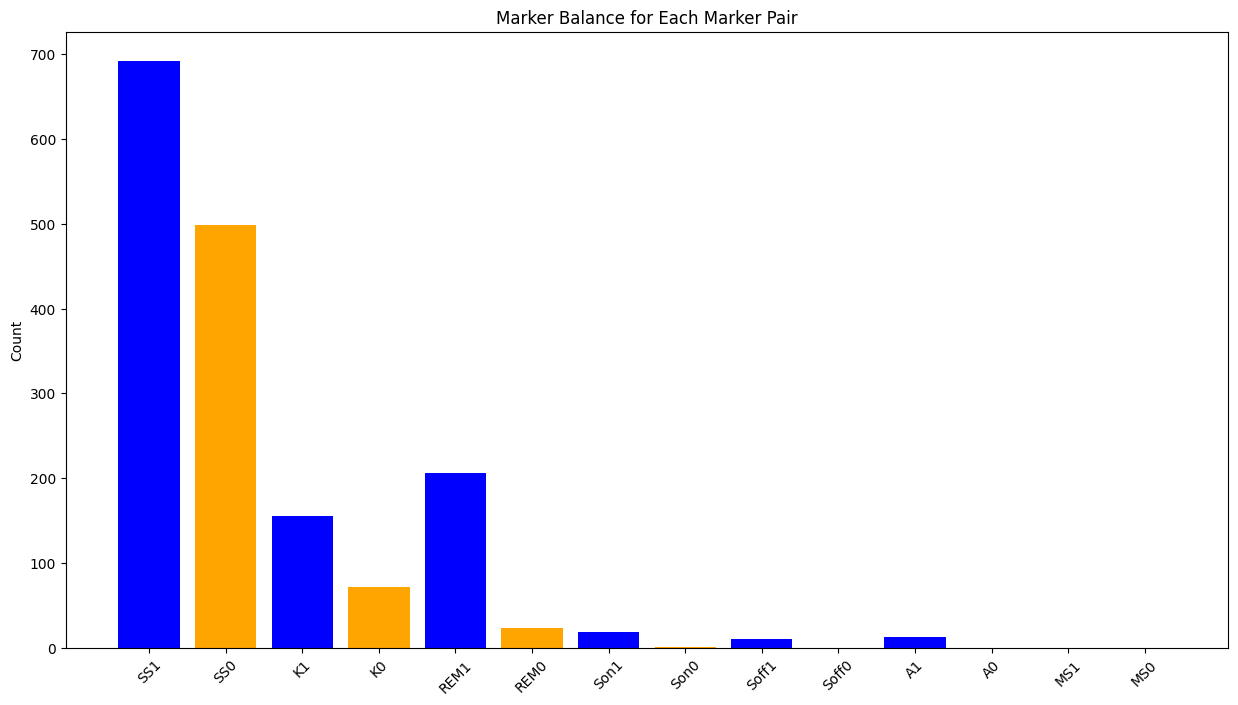

In [ ]:
# Prepare data for the plot
marker_balance = []
for i in range(0, len(marker_columns), 2):
    marker_balance.append(df[marker_columns[i]].sum())
    marker_balance.append(df[marker_columns[i+1]].sum())

# Defining colors for the plot (alternating colors for each pair)
colors = ['blue', 'orange'] * (len(marker_balance) // 2)

# Creating the bar plot with alternating colors
plt.figure(figsize=(15, 8))
plt.bar(range(len(marker_balance)), marker_balance, color=colors)
plt.title('Marker Balance for Each Marker Pair')
plt.ylabel('Count')
plt.xticks(range(len(marker_balance)), marker_columns, rotation=45)
plt.show()

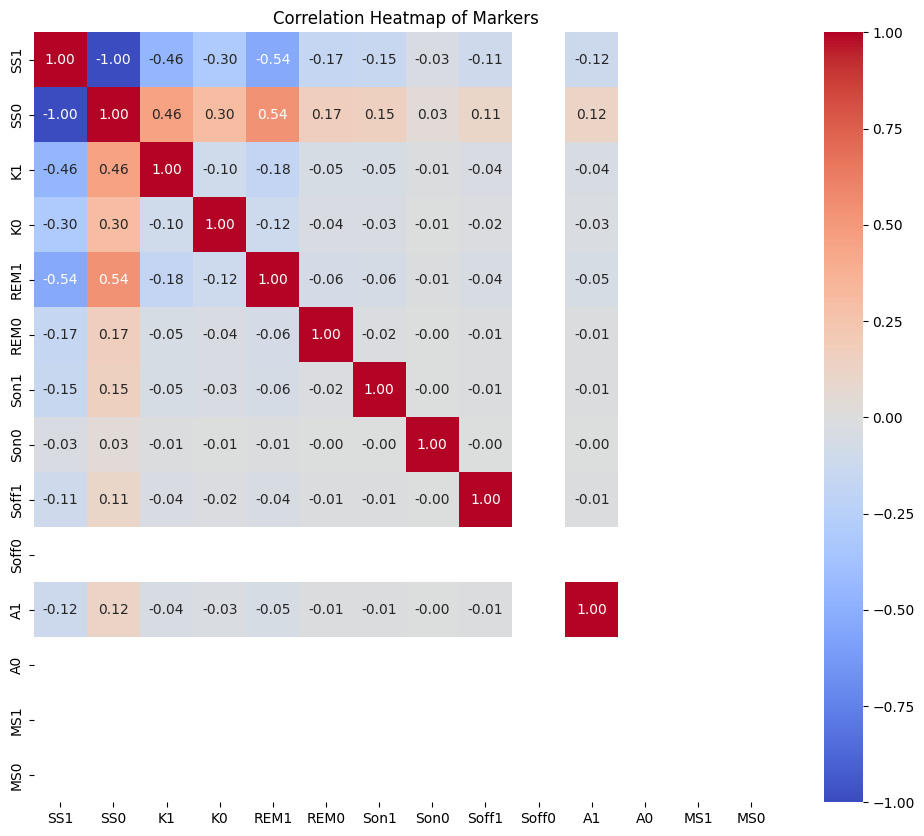

In [ ]:
# Code to create a correlation heatmap for the markers

# Selecting only the marker columns for the correlation analysis
marker_data = df[['SS1', 'SS0', 'K1', 'K0', 'REM1', 'REM0', 'Son1', 'Son0', 'Soff1', 'Soff0', 'A1', 'A0', 'MS1', 'MS0']]

# Calculating the correlation matrix
corr_matrix = marker_data.corr()

# Creating the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Markers')
plt.show()


#### EEG Analysis Overview
In this section, we guide you through the nuances of EEG data analysis. From loading and inspecting EEG data to understand brain wave patterns, to advanced visualizations and signal processing techniques, this segment is crucial for extracting meaningful insights from neural data.

#### Key Steps in EEG Analysis
- **Data Loading and Inspection**: Learn to load EEG data, inspect channel information, and understand sampling rates.
- **Visualization and Signal Processing**: Explore methods for visualizing EEG data in time and frequency domains, emphasizing the importance of spectral analysis.
- **Artifact Removal**: Discover preprocessing steps for enhancing EEG data quality, focusing on artifact identification and removal.


In [ ]:
# First, install MNE
!pip install mne

In [ ]:
import mne
import os
from scipy.io import loadmat

# Replace with the path to your .mat file containing EEG data
mat_file_path = '/content/drive/My Drive/Colab Notebooks/NTX_Data_Challenge/Training_data/S003_night5_hackathon_raw.mat'

# Load the .mat file using scipy
mat = loadmat(mat_file_path)

# Extract EEG data
eeg_data = mat['EEG'][0, 0]['data']

# Create an MNE Info object, necessary to create RawArray
info = mne.create_info(ch_names=['EEG1'], sfreq=250, ch_types=['eeg'])

# Create the RawArray object
raw = mne.io.RawArray(eeg_data, info)

# Now you can plot the raw data, create epochs, etc., using MNE functions.


Creating RawArray with float64 data, n_channels=1, n_times=5772730
    Range : 0 ... 5772729 =      0.000 ... 23090.916 secs
Ready.


In [ ]:
# Create an MNE Info object for one EEG channel
info = mne.create_info(ch_names=['EEG1'], sfreq=250, ch_types=['eeg'])

# Inspect the loaded data
print(raw)
print(raw.info)

<RawArray | 1 x 5772730 (23090.9 s), ~44.0 MB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: EEG1
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 250.0 Hz
>


In [2]:
# Import the necessary functions
from mne.time_frequency import psd_array_welch

# Compute the Power Spectral Density (PSD) of the data
sfreq = 250  # Replace with your actual sampling frequency
psd, freqs = psd_array_welch(raw.get_data(), sfreq=sfreq, fmax=50)

# Since we only have one channel, psd will have shape (1, n_freqs), we index 0 to get the 1D array
psd = psd[0, :]  # Now psd is 1D

# Plot the PSD
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(freqs, 10 * np.log10(psd), color='blue')  # No need to transpose psd now
ax.set_title('Power Spectral Density (PSD) for EEG1')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power Spectral Density (dB)')
ax.set_xlim([0, 50])  # Set the frequency limit, if needed
plt.show()


NameError: name 'raw' is not defined

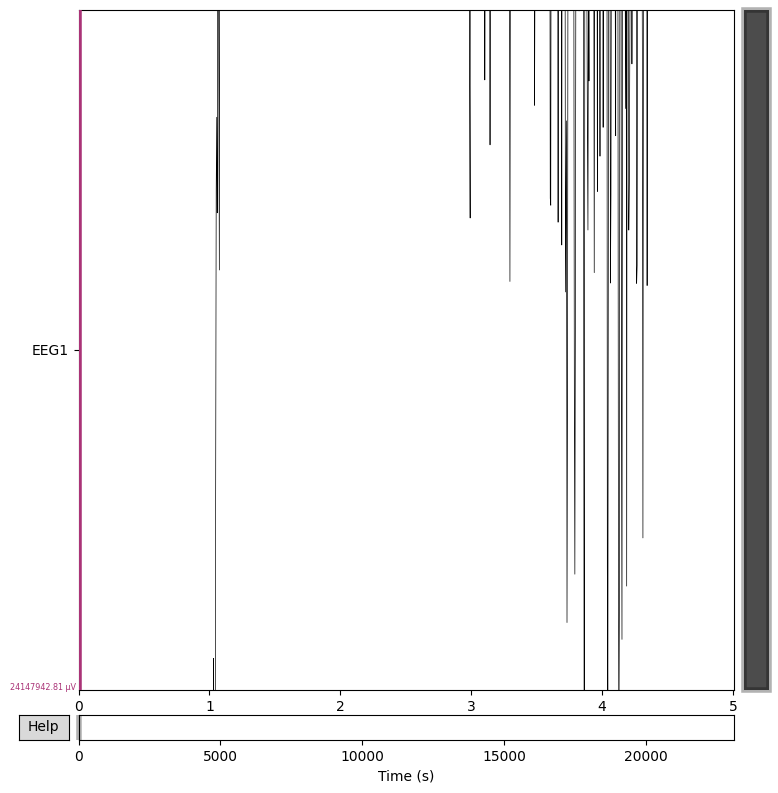

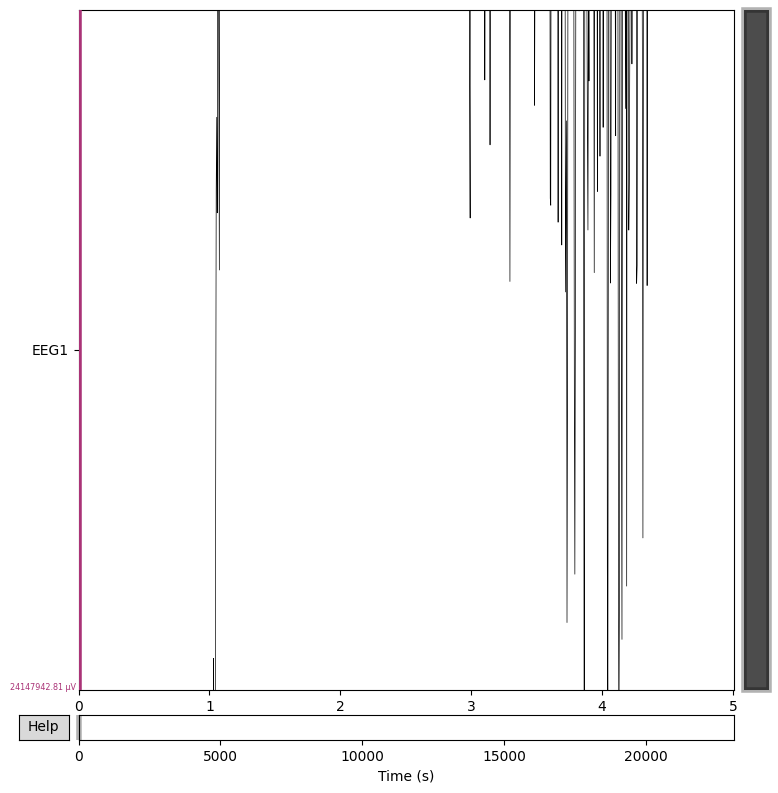

In [ ]:
raw.plot(duration=5, n_channels=1, scalings='auto')


In [ ]:
print(raw.info['ch_names'])


['EEG1']


Not setting metadata
1050 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1050 events and 7501 original time points ...


<ipython-input-52-f6212d1c2f34>:32: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, events=events, tmin=tmin, tmax=tmax, baseline=None, preload=True)


1 bad epochs dropped
Not setting metadata
1049 matching events found
No baseline correction applied
0 projection items activated


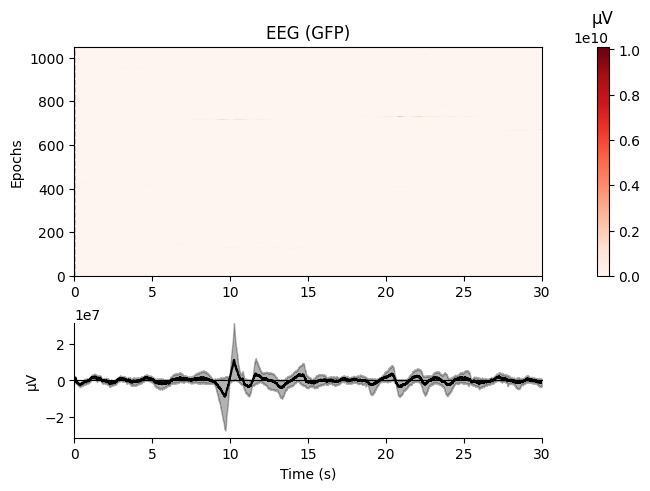

Need more than one channel to make topography for eeg. Disabling interactivity.


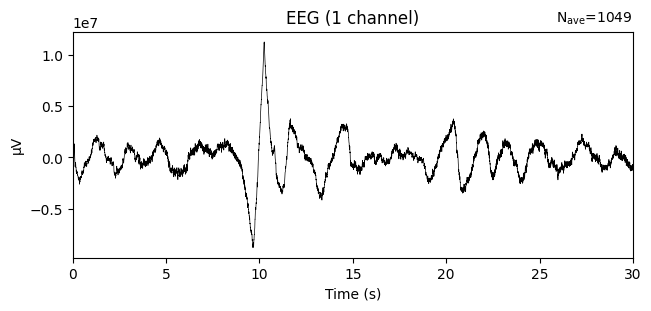

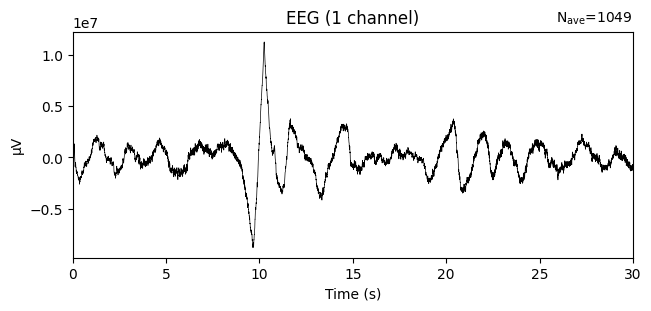

In [ ]:
# Load events from CSV
events_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NTX_Data_Challenge/Training_data/S003_labeled.csv')

# Columns representing markers
marker_columns = ['SS1', 'SS0', 'K1', 'K0', 'REM1', 'REM0', 'Son1', 'Son0', 'Soff1', 'Soff0', 'A1', 'A0', 'MS1', 'MS0']

# 'Timestamp' is the column for event times
timestamps = events_df['Timestamp'].values

# 'Epochs' is the column for epoch number
epoch_numbers = events_df['Epochs'].values

# Create a binary column 'EventPresent' indicating the presence of any marker
events_df['EventPresent'] = events_df[marker_columns].sum(axis=1).clip(upper=1)

# Extract events where any marker is present
event_times = timestamps[events_df['EventPresent'] == 1]
epoch_ids = epoch_numbers[events_df['EventPresent'] == 1]

# Create an events array for MNE
events = np.column_stack([event_times, np.zeros(len(event_times), dtype=int), epoch_ids])

# Define the sampling frequency of your raw EEG data
sfreq = 250  # Replace with the actual sampling frequency

# Define the epoch length
tmin = 0  # Start of each epoch (at event)
tmax = 30  # End of each epoch (30 seconds after event)


# Create epochs
epochs = mne.Epochs(raw, events=events, tmin=tmin, tmax=tmax, baseline=None, preload=True)

# Plot the epochs
epochs.plot_image()

# Compute the average (evoked) response
evoked = epochs.average()
evoked.plot()


# Task To achieve

*Objective:*

Train a multilabels classification model to predict the labels for a given dataset and optimize for the F1 score.

*Evaluation Metric:*

The primary metric for performance evaluation is the F1 score. The F1 score is the harmonic mean of precision and recall and is suitable for imbalanced datasets.

*Code Submission:*

Participants are required to submit their code along with the trained model.
Code should be well-documented and include instructions on how to reproduce the results.

